In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [34]:
df=pd.read_csv('heights.csv')
df.sample(5)

,gender,height
5330,Female,64.720794
4394,Male,66.299441
1782,Male,67.841792
2676,Male,66.094319
2073,Male,65.908527


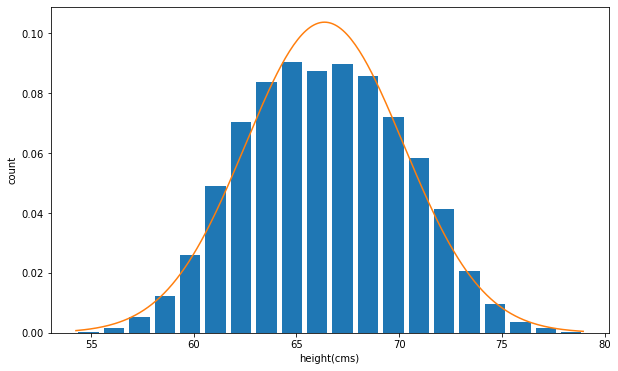

In [35]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('height(cms)')
plt.ylabel('count')
rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [36]:
df.shape

(10000, 2)

In [37]:
df.height.mean()

66.3675597548656

In [38]:
df.height.std()

3.847528120795573

outlier detection and removal using 3 standard deviation

In [39]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725232

In [40]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392478876

In [43]:
df_no_outlier=df[(df.height>lower_limit) & (df.height<upper_limit)]
df_no_outlier.shape

(9993, 2)

In [44]:
df_no_outlier.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


using z-score

In [45]:
df.shape

(10000, 2)

In [46]:
df['z-score']=(df.height-df.height.mean())/df.height.std()

In [47]:
df.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [48]:
df[df['z-score']>3]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [52]:
df[df['z-score']<-3]

,gender,height,z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [54]:
df_no_outliers=df[(df['z-score']>-3) & (df['z-score']<3)]
df_no_outliers.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [55]:
df_no_outliers.shape

(9993, 3)